<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/hackerearth_carnival_wars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/HackerEarth%20Carnival%20Wars!%20challenge/train.csv',index_col='Product_id')

In [3]:
df.insert(1,'Date',pd.to_datetime(df['instock_date']).dt.date,allow_duplicates=True)
df=df.drop(['instock_date'],axis=1)

In [4]:
df.shape

(6368, 14)

In [5]:
df[0:10]

,Stall_no,Date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Product_id,,,,,,,,,,,,,,
BRAE2NF6JA5GUEXG,37.0,2015-08-22,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
TUNE8SFB6RJN2HSD,38.0,2016-03-27,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
BRAEAR7WZPQGPBZU,9.0,2015-08-18,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
JWSEBUKYQPMBZ3RK,7.0,2016-03-29,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
SHIECAYW3VZWGZGX,23.0,2015-09-25,162,Brilee,No,Technology,1,49,0.0,633.0,6.0,3959.0,6104.0,5631.247872
SHOE4FZGGTE7HJXN,33.0,2014-12-08,462,Zoe,No,Cosmetics,3,57,0.0,263.0,13.0,2006.0,5257.0,3874.264992
SHOE6QGAYFFMBWG6,4.0,2015-09-22,23,Koby,Yes,Educational,1,67,0.0,104.0,15.0,3596.0,5921.0,4820.943600
KRTEBSMKCGFESHYX,26.0,2016-03-28,156,Tiffani,Yes,Child_care,0,53,0.0,310.0,6.0,6965.0,10194.0,8837.724240


In [6]:
df['Discount_avail'].value_counts()

0.0    5441
1.0     889
Name: Discount_avail, dtype: int64

In [7]:
df.loc[df['Stall_no'] == 20.0]['Product_Category'].value_counts()

Repair         20
Child_care     19
Pet_care       19
Home_decor     18
Fashion        18
Technology     17
Cosmetics      17
Hospitality    15
Educational    11
Organic        11
Name: Product_Category, dtype: int64

In [8]:
max(df.loc[(df['Stall_no'] == 20.0) & (df['Product_Category'] == 'Repair')]['Selling_Price'])

10833.101568

In [9]:
df.loc[df['Product_Category'].isin(['Repair'])]

,Stall_no,Date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Product_id,,,,,,,,,,,,,,
JWSEBUKYQPMBZ3RK,7.0,2016-03-29,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
SUDEGGB5GCHTY53K,1.0,2016-03-29,268,Juliano,Yes,Repair,2,22,0.0,274.0,1.0,3256.0,6033.0,4906.662600
NKCECHHZSUD4KNZF,40.0,2015-09-26,198,Zahraa,Yes,Repair,0,93,0.0,215.0,7.0,3165.0,4178.0,3833.067392
BRAE8TFHWYCTDUM3,17.0,2015-08-19,101,Roslyn,No,Repair,0,19,0.0,NaN,9.0,950.0,1580.0,1563.983586
ACCE6DZC4SANU636,29.0,2015-08-17,423,Otis,No,Repair,0,12,0.0,280.0,8.0,4843.0,8913.0,7162.783650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NKCE6WKBNBGFYKPW,25.0,2015-11-21,90,Oshea,Yes,Repair,0,71,0.0,216.0,3.0,683.0,1023.0,1058.567400
ACCEGKXQ2AQQ2AQV,18.0,2016-02-26,452,Quetzalli,No,Repair,0,46,1.0,205.0,8.0,4345.0,6564.0,844.141694
SWSEBHCP5YSCUU2S,13.0,2015-05-06,358,Adelaide,No,Repair,3,50,0.0,266.0,3.0,3205.0,14174.0,8900.778096


In [10]:
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
df = df[df.columns[df.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
df = df.loc[df.isnull().mean(axis=1) < threshold]

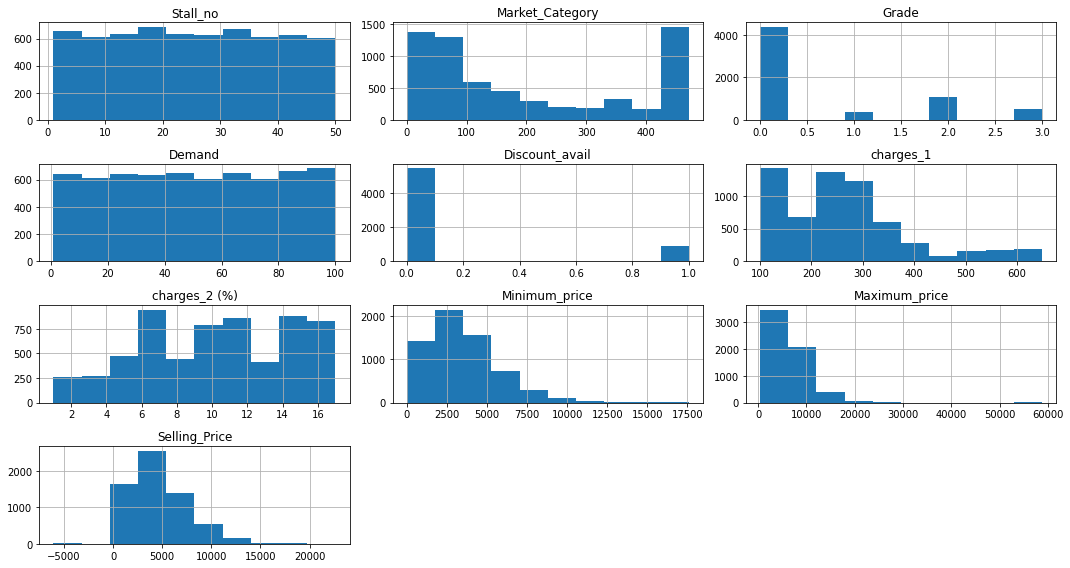

In [11]:
_=df.hist(figsize=(15,8))
plt.tight_layout()

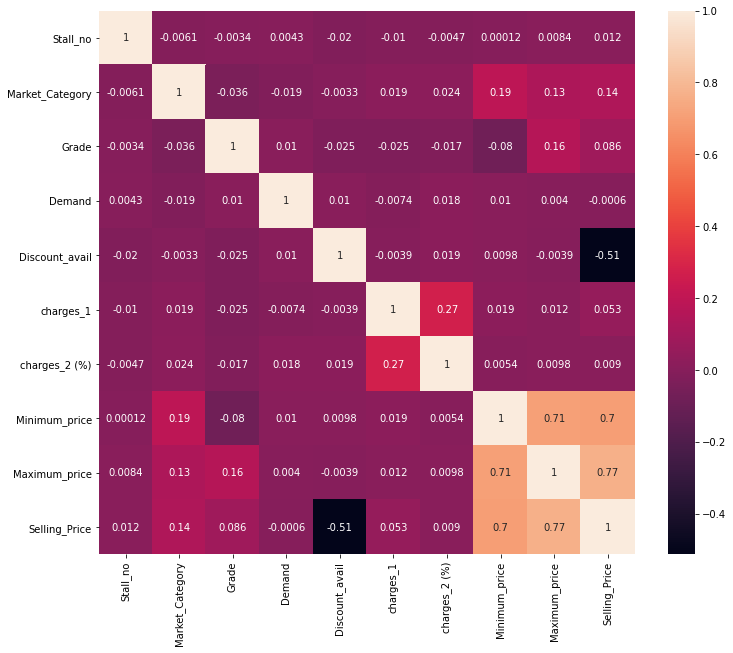

In [12]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


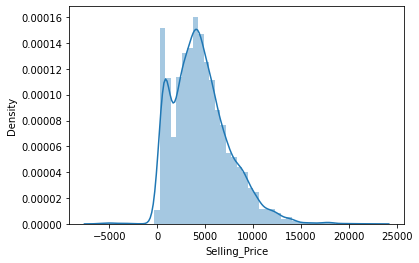

In [13]:
sns.distplot(df.Selling_Price)

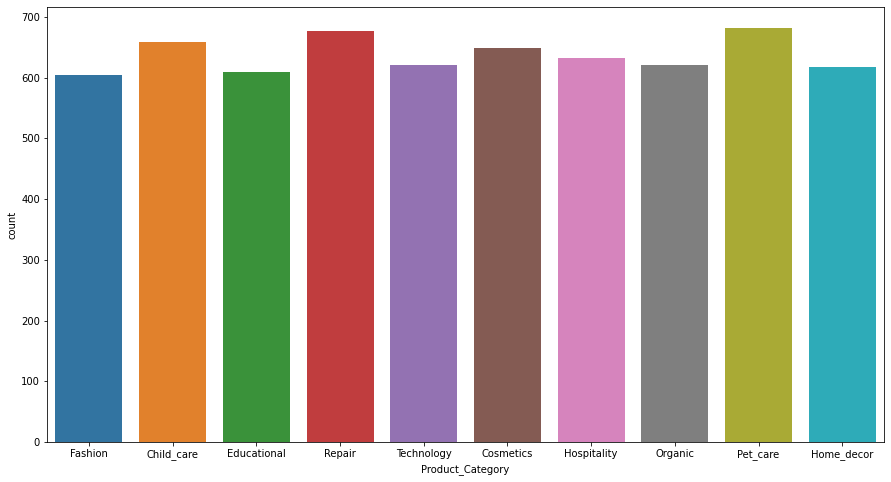

In [14]:
plt.figure(figsize=(15,8))
_=sns.countplot(x='Product_Category',data=df)

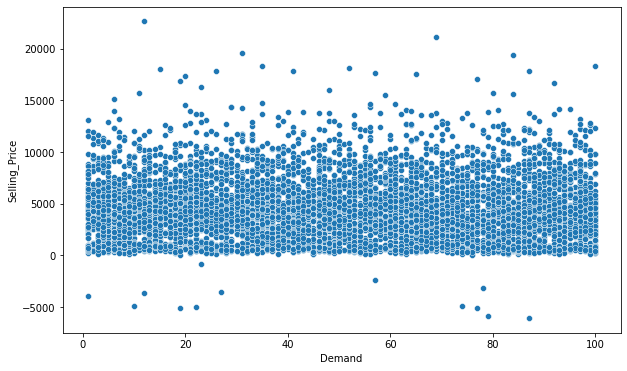

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Demand',y='Selling_Price',data=df)

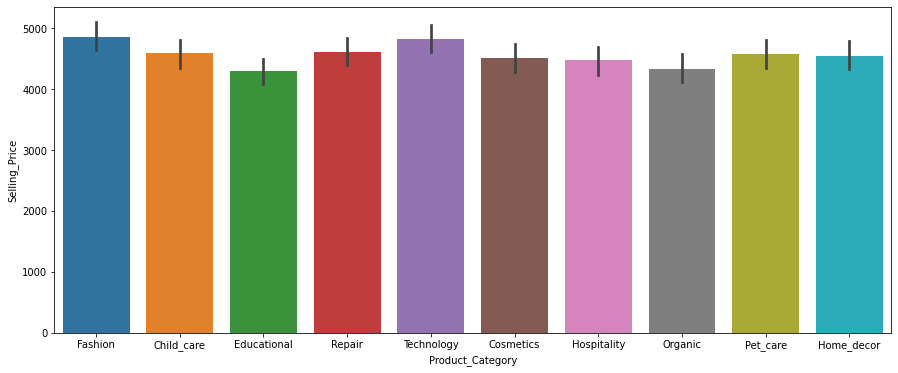

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(x='Product_Category',y='Selling_Price',data=df)

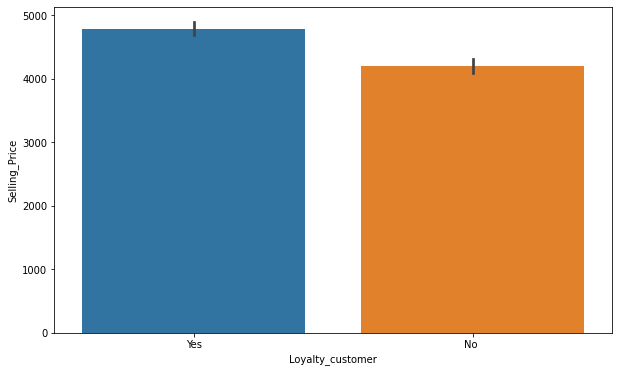

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='Loyalty_customer',y='Selling_Price',data=df)

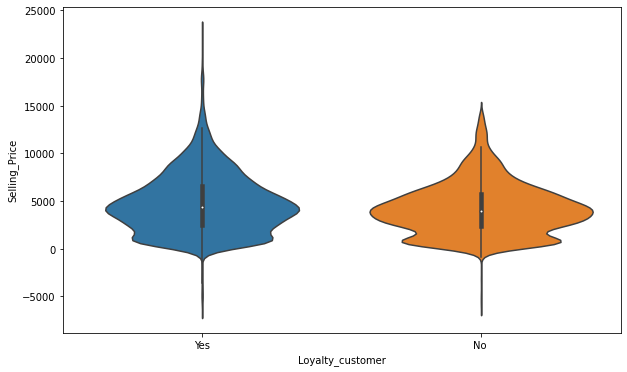

In [18]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Loyalty_customer', y='Selling_Price', data=df)

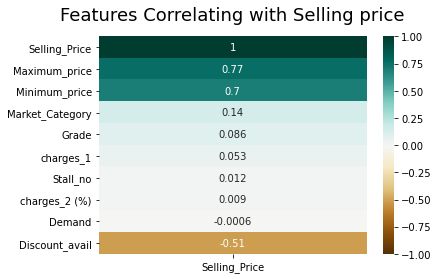

In [19]:
heatmap = sns.heatmap(df.corr()[['Selling_Price']].sort_values(by='Selling_Price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Selling price', fontdict={'fontsize':18}, pad=16);

In [20]:
df.shape

(6368, 14)

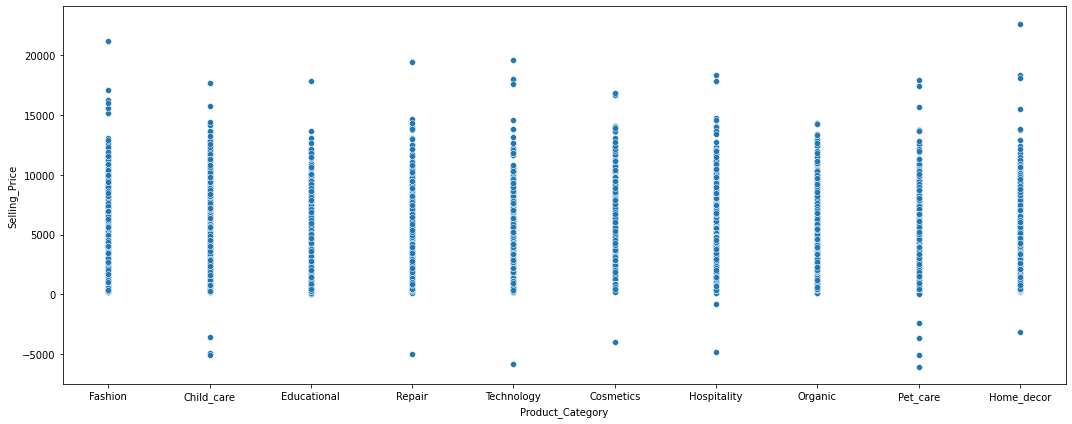

In [21]:
x=df['Product_Category']
y=df['Selling_Price']
plt.figure(figsize=(15,6)),
sns.scatterplot(x=x,y=y)
plt.tight_layout()

In [22]:
df = df[df.Selling_Price >= 0]
df = df[df['Maximum_price'].notna()]
df = df[df['Stall_no'].notna()]
df = df[df['Discount_avail'].notna()]
df = df[df['charges_1'].notna()]
df = df[df['charges_2 (%)'].notna()]

In [23]:
df['Minimum_price']=df['Minimum_price'].fillna(df['Minimum_price'].mean()).astype(int)
df['Diff'] = df['Maximum_price'] - df['Minimum_price']
df['Total'] = df['Maximum_price'] + df['Minimum_price']
df['Average_price'] = (df['Maximum_price'] + df['Minimum_price'])/2
df['Max_Min_ratio'] = df['Maximum_price'] / df['Minimum_price']
df['Max_Min_mul'] = df['Maximum_price'] * df['Minimum_price']

In [24]:
df=df.drop(['Customer_name','Date'],axis=1)

In [25]:
df.isnull().sum().sort_values(ascending=False)

Max_Min_mul         0
charges_1           0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_2 (%)       0
Max_Min_ratio       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
Diff                0
Total               0
Average_price       0
Stall_no            0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5588 entries, BRAE2NF6JA5GUEXG to CAGE53FSAFWZRHFF
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          5588 non-null   float64
 1   Market_Category   5588 non-null   int64  
 2   Loyalty_customer  5588 non-null   object 
 3   Product_Category  5588 non-null   object 
 4   Grade             5588 non-null   int64  
 5   Demand            5588 non-null   int64  
 6   Discount_avail    5588 non-null   float64
 7   charges_1         5588 non-null   float64
 8   charges_2 (%)     5588 non-null   float64
 9   Minimum_price     5588 non-null   int64  
 10  Maximum_price     5588 non-null   float64
 11  Selling_Price     5588 non-null   float64
 12  Diff              5588 non-null   float64
 13  Total             5588 non-null   float64
 14  Average_price     5588 non-null   float64
 15  Max_Min_ratio     5588 non-null   float64
 16  Max_Min_mul       55

In [27]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
df['Loyalty_customer'] = lbl_enc.fit_transform(df['Loyalty_customer']).astype(int)
df['Product_Category'] = lbl_enc.fit_transform(df['Product_Category']).astype(int)

In [28]:
x=df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price']
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.20,random_state=42)

In [29]:
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor(n_estimators= 1700,random_state = 1, max_depth = 15,verbose = 1)
etr.fit(x_train,y_train)
y_pred=(etr.predict(x_val))
score = max(0,100-np.sqrt(mean_squared_log_error(y_val, y_pred )))
score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:   25.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:    0.6s finished


99.98183624628457

In [30]:
!pip install tpot

     |████████████████████████████████| 92kB 3.7MB/s 
     |████████████████████████████████| 163kB 13.5MB/s 
     |████████████████████████████████| 157.5MB 82kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11954 sha256=5248fb5d2f6f2f9796ed8a176cc20b716400517d0830b3084b21ea419cb32ec0
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [31]:
import time
ts = time.time()
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

exported_pipeline = make_pipeline(StackingEstimator(ExtraTreesRegressor(n_estimators= 1700,random_state = 1, max_depth = 15,verbose = 1)),
                                                ExtraTreesRegressor(n_estimators= 1700,random_state = 1, max_depth = 15,verbose = 1))

exported_pipeline.fit(x,y)
y_pred=(exported_pipeline.predict(x_val))
score = max(0,100-np.sqrt(mean_squared_log_error( y_val, y_pred )))
print(score)
print(time.time() - ts)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:   29.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:   31.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


99.99937158560552
68.87952399253845


[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:    0.7s finished


In [32]:
dft=pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/HackerEarth%20Carnival%20Wars!%20challenge/test.csv',index_col='Product_id')
dft.isnull().sum().sort_values(ascending=False)
dft=dft.drop(['instock_date','Customer_name'],axis=1)

In [33]:
dft['charges_2 (%)']=dft['charges_2 (%)'].fillna(dft['charges_2 (%)'].mean()).astype(int)
dft['charges_1']=dft['charges_1'].fillna(dft['charges_1'].mean()).astype(int)
dft['Minimum_price']=dft['Minimum_price'].fillna(dft['Minimum_price'].mean()).astype(int)
dft['Stall_no']=dft['Stall_no'].fillna(dft['Stall_no'].mean()).astype(int)

lbl_enc = LabelEncoder()
dft['Loyalty_customer'] = lbl_enc.fit_transform(dft['Loyalty_customer']).astype(int)
dft['Product_Category'] = lbl_enc.fit_transform(dft['Product_Category']).astype(int)

In [34]:

dft['Diff'] = dft['Maximum_price'] - dft['Minimum_price']
dft['Total'] = dft['Maximum_price'] + dft['Minimum_price']
dft['Average_price'] = (dft['Maximum_price'] + dft['Minimum_price'])/2
dft['Max_Min_ratio'] = dft['Maximum_price'] / dft['Minimum_price']
dft['Max_Min_mul'] = dft['Maximum_price'] * dft['Minimum_price']

In [35]:
Sales_price=exported_pipeline.predict(dft)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:    1.3s finished


In [36]:
dft.insert(11,'Selling_Price',Sales_price,allow_duplicates=True)

In [37]:
a=dft['Selling_Price']
a[0:20]

Product_id
SCHE4YSTDVPVZVXW     3304.438887
ACCEGCATKHNRXUHW     1933.574593
NKCE6GJ5XVJDXNNZ    11718.686901
NKCEB8BK3ZXDHDHM     9473.419165
TOPEFDXSAHRNPF94     5692.009957
ACCE558KZHEPZYMG     9571.745910
ACCEAZCVAMFHDPY7     5246.210540
NKCDYNY37JPBGBVM     2532.541425
NKCEY8KWY33FCUYD     7517.034152
RNGE4YPTQYRECV9J     4586.321912
NKCE88AHBHJZREXH     3917.166753
CLTEJ5ZZGBP4JGGE     7912.717816
WATE3NWH5FZWAMDA     8079.518138
CAGE53FSFZVFPFHQ     1753.315375
PCSEAKVBFFPGCHNZ     3801.527376
WATDFFH3KJYBTYGG     7323.894735
NKCDWHFQSCHHYZMP     2747.440173
RNGEB2PG3Q5RKDW6     3427.959934
NKCE5UY9HHPZGGUZ     4434.694764
KTAEHETW3ZCMFMJR     4138.083527
Name: Selling_Price, dtype: float64